In [2]:
import pandas as pd
import json

In [31]:
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)
drop_columns = ['postal_code','address','name']
df_b = df_b.drop(drop_columns, axis=1)

In [32]:
import numpy as np
df_b=df_b.replace(to_replace='None', value=np.nan)
df_b=df_b[~df_b['categories'].isnull()]
df_b=df_b[df_b['categories'].str.contains('Restaurants')]
df_b.head(5)

,business_id,city,state,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Boulder,CO,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Vancouver,BC,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
7,jFYIsSb7r1QeESVUnXPHBw,Columbus,OH,39.947007,-82.997471,4.5,11,1,None,"Breakfast & Brunch, Restaurants","{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
12,HPA_qyMEddpAEtFof02ixg,Peabody,MA,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [6]:
remove=['is_open','attributes','categories','hours']
df_b=df_b.drop(remove,axis=1)
df_b.head(3)

,business_id,city,state,latitude,longitude,stars,review_count
0,6iYb2HFDywm3zjuRg0shjw,Boulder,CO,40.017544,-105.283348,4.0,86
1,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,4.0,126
5,D4JtQNTI4X3KcbzacDJsMw,Vancouver,BC,49.251342,-123.101333,3.5,169


Text(0.5, 1.0, '25th city with the highest amount of reviews')

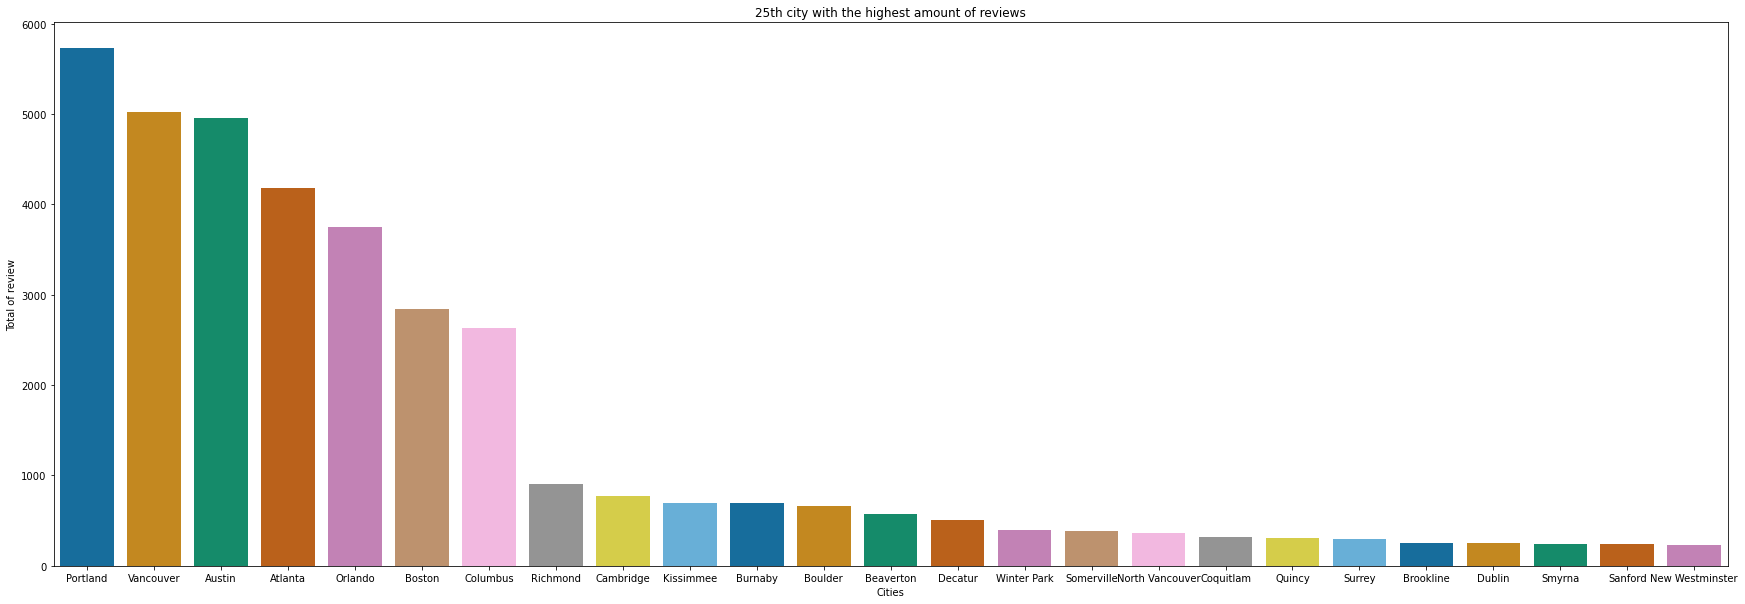

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax= plt.subplots(1,1,figsize=(30,10))
a=df_b.groupby(by=['city'],as_index=False).count().sort_values(by='stars',ascending=False)[0:25]
sns.barplot(data=a,x='city',y='business_id',palette='colorblind')
plt.ylabel('Total of review')
plt.xlabel('Cities')
plt.title('25th city with the highest amount of reviews')

In [8]:
a.head(2)

,city,business_id,state,latitude,longitude,stars,review_count
330,Portland,5730,5730,5730,5730,5730,5730
407,Vancouver,5026,5026,5026,5026,5026,5026


Text(0.5, 1.0, '10th states with the highest amount of reviews')

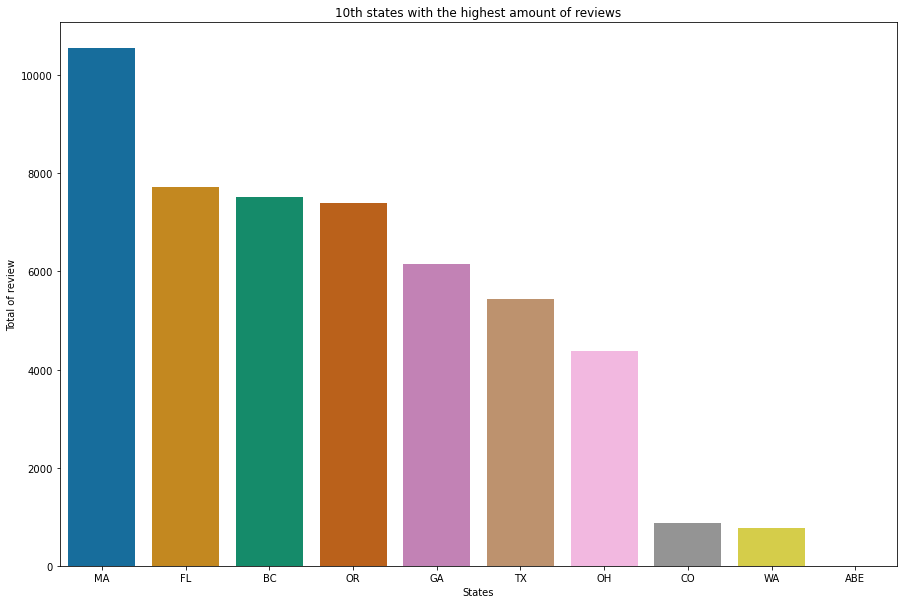

In [59]:
h=df_b.groupby(by='state',as_index=False).count().sort_values(by='stars',ascending=False)
fig, ax= plt.subplots(1,1,figsize=(15,10))
sns.barplot(data=h[0:10],x='state',y='stars',palette='colorblind')
plt.ylabel('Total of review')
plt.xlabel('States')
plt.title('10th states with the highest amount of reviews')

In [10]:
n=df_b.groupby(by='city',as_index=False).count()
n.head()

,city,business_id,state,latitude,longitude,stars,review_count
0,ATLANTA,2,2,2,2,2,2
1,AUSTIN,3,3,3,3,3,3
2,Alafaya,5,5,5,5,5,5
3,Alamonte Springs,1,1,1,1,1,1
4,Allston,172,172,172,172,172,172


In [146]:
d=df_b.groupby(by=['city'],as_index=False).count().sort_values(by='stars',ascending=False)
five=df_b[df_b['stars']==5].groupby(by='city',as_index=False).count()
five=five.merge(d,on='city',how='right')
five=five.fillna(0)
five['density']=(five['business_id_x']/five['business_id_y'])*100
five.head()

,city,business_id_x,state_x,latitude_x,longitude_x,stars_x,review_count_x,is_open_x,attributes_x,categories_x,...,state_y,latitude_y,longitude_y,stars_y,review_count_y,is_open_y,attributes_y,categories_y,hours_y,density
0,Portland,351.0,351.0,351.0,351.0,351.0,351.0,351.0,334.0,351.0,...,5730,5730,5730,5730,5730,5730,5685,5730,4898,6.125654
1,Vancouver,87.0,87.0,87.0,87.0,87.0,87.0,87.0,82.0,87.0,...,5026,5026,5026,5026,5026,5026,4963,5026,4205,1.730999
2,Austin,255.0,255.0,255.0,255.0,255.0,255.0,255.0,250.0,255.0,...,4957,4957,4957,4957,4957,4957,4911,4957,4243,5.144240
3,Atlanta,72.0,72.0,72.0,72.0,72.0,72.0,72.0,68.0,72.0,...,4179,4179,4179,4179,4179,4179,4149,4179,3494,1.722900
4,Orlando,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,...,3748,3748,3748,3748,3748,3748,3722,3748,3229,2.267876


Text(0.5, 1.0, 'Cities percentage of reviews graded 5 stars')

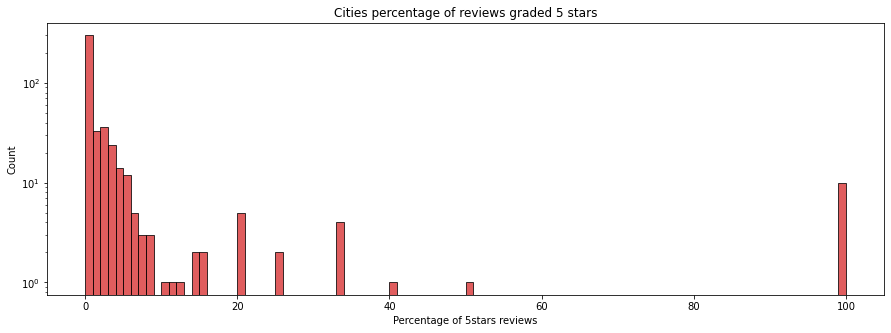

In [150]:
fig, ax= plt.subplots(1,1,figsize=(15,5))
sns.histplot(data=five,x='density',bins=100,color='tab:red',log_scale=(False,True), ax=ax)
plt.xlabel('Percentage of 5stars reviews')
plt.title('Cities percentage of reviews graded 5 stars')

Text(0.5, 1.0, '15th cities with the highest percentage of 5stars reviews')

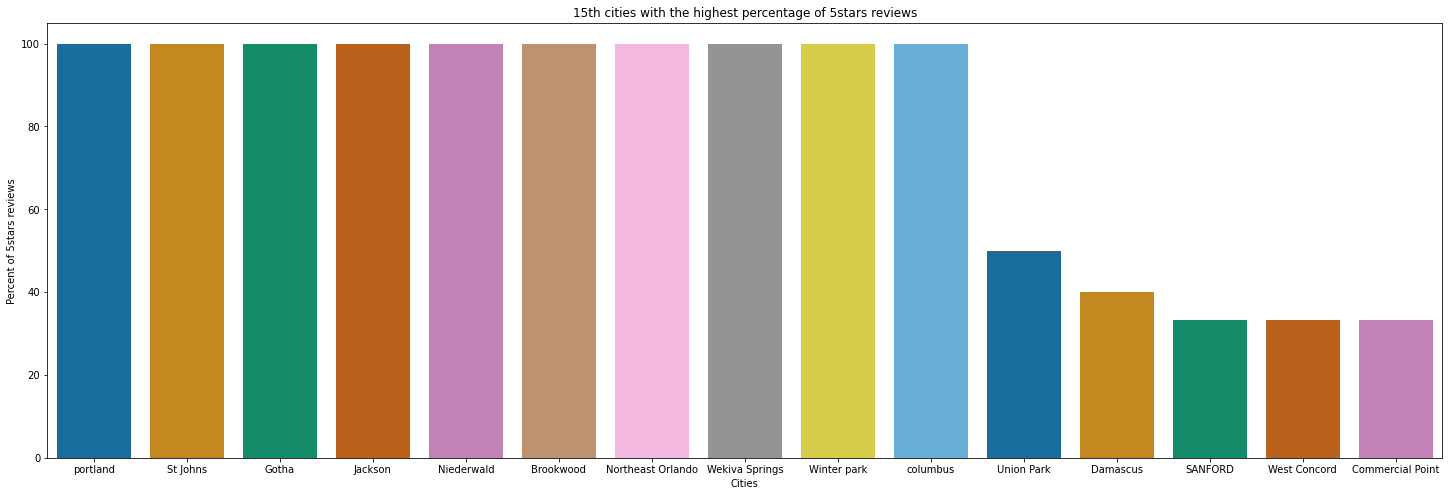

In [140]:
fig, ax= plt.subplots(1,1,figsize=(25,8))
sns.barplot(data=c.sort_values(by='density',ascending=False)[0:15],x='city',y='density',palette='colorblind')
plt.ylabel('Percent of 5stars reviews')
plt.xlabel('Cities')
plt.title('15th cities with the highest percentage of 5stars reviews')

Text(0.5, 1.0, '15th cities with the highest percentage of 1star reviews')

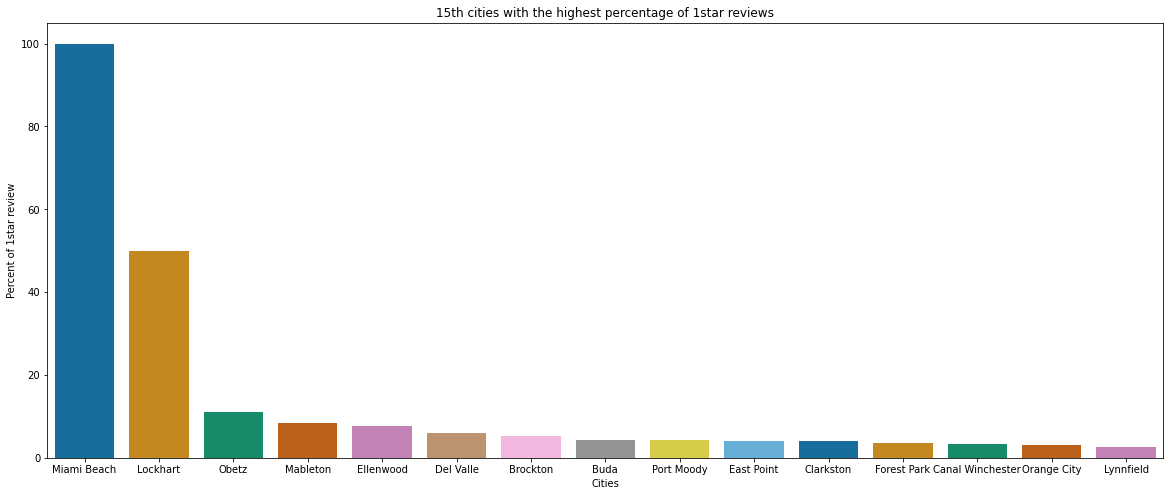

In [170]:
one=df_b[df_b['stars']==1].groupby(by='city',as_index=False).count()
one=one.merge(d,on='city',how='right')
one=one.fillna(0)
one['density']=(one['business_id_x']/one['business_id_y'])*100
fig, ax= plt.subplots(1,1,figsize=(20,8))
sns.barplot(data=one.sort_values(by='density',ascending=False)[0:15],x='city',y='density',palette='colorblind')
plt.ylabel('Percent of 1star review')
plt.xlabel('Cities')
plt.title('15th cities with the highest percentage of 1star reviews')

In [167]:
one=df_b[df_b['stars']<=1.5][df_b['stars']>=1.0 ].groupby(by='city',as_index=False).count()
one=one.merge(d,on='city',how='right')
one=one.fillna(0)
one['density']=(one['business_id_x']/one['business_id_y'])*100

<ipython-input-167-9d84a16ba675>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  one=df_b[df_b['stars']<=1.5][df_b['stars']>=1.0 ].groupby(by='city',as_index=False).count()


In [168]:
two=df_b[df_b['stars']<=2.5 ][df_b['stars']>=2 ].groupby(by='city',as_index=False).count()
two=two.merge(d,on='city',how='right')
two=two.fillna(0)
two['density']=(two['business_id_x']/two['business_id_y'])*100

<ipython-input-168-e8fbbd5e79c2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  two=df_b[df_b['stars']<=2.5 ][df_b['stars']>=2 ].groupby(by='city',as_index=False).count()


In [152]:
three=df_b[df_b['stars']<=3.5 ][df_b['stars']>=3 ].groupby(by='city',as_index=False).count()
three=three.merge(d,on='city',how='right')
three=three.fillna(0)
three['density']=(three['business_id_x']/three['business_id_y'])*100

<ipython-input-152-dd0519df3eb5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  three=df_b[df_b['stars']<=3.5 ][df_b['stars']>=3 ].groupby(by='city',as_index=False).count()


In [153]:
four=df_b[df_b['stars']<=4.5 ][df_b['stars']>=4 ].groupby(by='city',as_index=False).count()
four=four.merge(d,on='city',how='right')
four=four.fillna(0)
four['density']=(four['business_id_x']/four['business_id_y'])*100

<ipython-input-153-3f43a28ce85a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  four=df_b[df_b['stars']<=4.5 ][df_b['stars']>=4 ].groupby(by='city',as_index=False).count()


Text(0.5, 1.0, 'Cities percentage of reviews graded 1 or 1.5 stars')

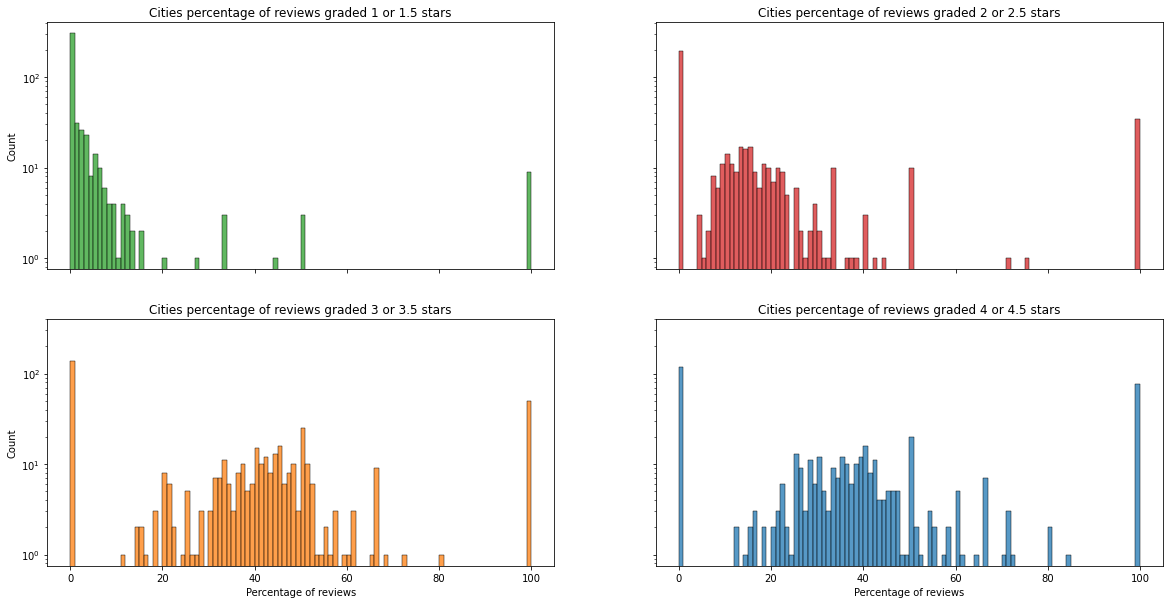

In [169]:
fig, ax= plt.subplots(2,2,figsize=(20,10),sharex=True,sharey=True)
sns.histplot(data=four,x='density',bins=100,log_scale=(False,True),color='tab:blue',ax=ax[1,1])
ax[1,1].set_xlabel('Percentage of reviews')
ax[1,1].set_title('Cities percentage of reviews graded 4 or 4.5 stars')
sns.histplot(data=three,x='density',bins=100,log_scale=(False,True),color='tab:orange',ax=ax[1,0])
ax[1,0].set_xlabel('Percentage of reviews')
ax[1,0].set_title('Cities percentage of reviews graded 3 or 3.5 stars')
sns.histplot(data=two,x='density',bins=100,log_scale=(False,True),color='tab:red',ax=ax[0,1])
ax[0,1].set_xlabel('Percentage of reviews')
ax[0,1].set_title('Cities percentage of reviews graded 2 or 2.5 stars')
sns.histplot(data=one,x='density',bins=100,log_scale=(False,True),color='tab:green',ax=ax[0,0])
ax[0,0].set_xlabel('Percentage of reviews')
ax[0,0].set_title('Cities percentage of reviews graded 1 or 1.5 stars')

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [17]:
lat = df_b['latitude'].values
lon = df_b['longitude'].values

Text(0.5, 1.0, 'Cities with the highest amount of reviews')

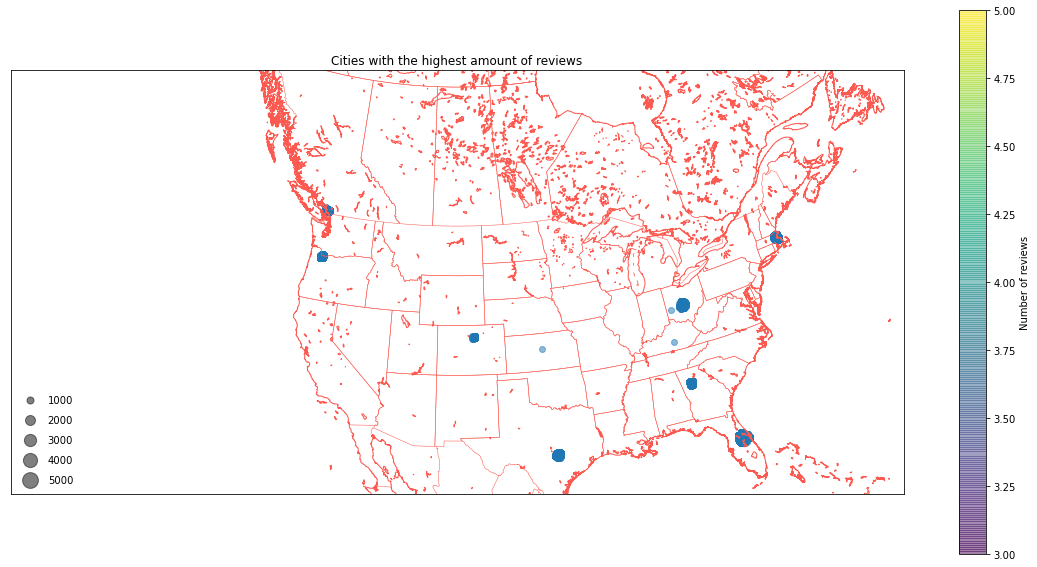

In [111]:
# 1. Draw the map background
fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=44.5, lon_0=-107,
            width=8.0E6, height=3.8E6)
#m.shadedrelief()
m.drawcoastlines(color='xkcd:coral')
m.drawcountries(color='xkcd:coral')
m.drawstates(color='xkcd:coral')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label='Number of reviews')
plt.clim(3, 5)

# make legend with dummy points
for i in [50, 100, 150, 200, 250]:
    plt.scatter([], [], c='k', alpha=0.5, s=i,
                label=str(i*2*10))
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left')
plt.title('Cities with the highest amount of reviews')

In [34]:
df_Bos=df_b[df_b['city']=='Boston']
df_Bos.head(2)

,business_id,city,state,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
26,hcRxdDg7DYryCxCoI8ySQA,Boston,MA,42.338544,-71.106842,2.5,24,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Shopping, Shopping Centers","{'Monday': '6:30-22:0', 'Tuesday': '6:30-22:0'..."
29,jGennaZUr2MsJyRhijNBfA,Boston,MA,42.363442,-71.025781,3.5,856,1,"{'NoiseLevel': 'u'average'', 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."


In [35]:
latB = df_Bos['latitude'].values
lonB = df_Bos['longitude'].values

Text(0.5, 1.0, 'Boston reviews')

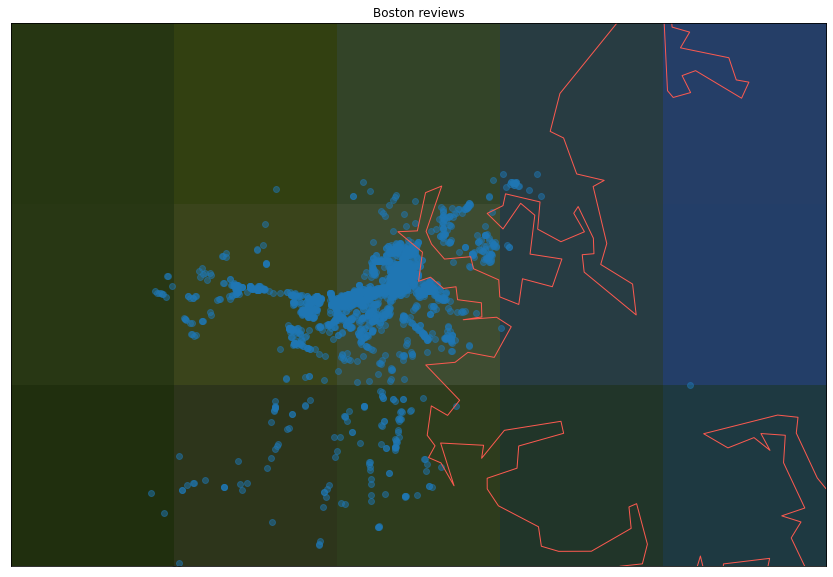

In [58]:
# 1. Draw the map background
fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=42.35, lon_0=-71.05,
            width=3.0E4, height=2.0E4)
m.bluemarble()
m.drawcoastlines(color='xkcd:coral')
m.drawcountries(color='xkcd:coral')
m.drawstates(color='xkcd:coral')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lonB, latB, latlon=True,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
#plt.colorbar(label='Number of reviews')
#plt.clim(3, 5)

# make legend with dummy points
for i in [10, 30, 50, 70, 90]:
    plt.scatter([], [], c='g', alpha=0.5, s=i,
                label=str(i*2*10))
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left')
plt.title('Boston reviews')